# Previsão de Votação de Deputados

### Aluno: Gustavo Silva Medeiros

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib

import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats.stats import pearsonr
from sklearn import preprocessing

%config InlineBackend.figure_format = 'png'
%matplotlib inline

### 2) Considere o pipeline mostrado nesse [link](https://www.kaggle.com/apapiu/regularized-linear-models) para construir seus modelos de regressão. Isso implica, dentre outras coisas:
### 2.1) Analisar as distribuições das variáveis para ver se estão enviesadas e precisam de correção; tratamento de valores ausentes, variáveis categóricas e normalização, quando for o caso.

In [2]:
# Colunas carregadas do CSV
cols = [
    "ano",
    "nome",
    "sexo",
    "estado_civil",
    "grau",
    "ocupacao",
    "uf",
    "partido",
    "quantidade_doacoes",
    "quantidade_doadores",
    "total_receita",
    "media_receita",
    "recursos_de_outros_candidatos/comites",
    "recursos_de_pessoas_fisicas",
    "recursos_de_pessoas_juridicas",
    "recursos_proprios",
    "quantidade_despesas",
    "quantidade_fornecedores",
    "total_despesa",
    "media_despesa",
    "votos",
]
# OBS 1: As colunas "sequencial_candidato" e "cargo" não foram consideradas atributos e não foram carregadas

df = pd.read_csv("eleicoes_2006_a_2010.csv", usecols=cols, index_col="nome")

# separa os dados de 2006 como treino e os dados de 2010 como teste e remove a coluna "ano"
train = df[(df['ano'] == 2006)].loc[:,'uf':]
test = df[(df['ano'] == 2010)].loc[:,'uf':]

# junta os dados de 2006 e 2010 sem as colunas "ano" e "votos"
all_data = pd.concat((
    train.loc[:,:'ocupacao'],
    test.loc[:,:'ocupacao']
))

In [3]:
all_data.head()

,uf,partido,quantidade_doacoes,quantidade_doadores,total_receita,media_receita,recursos_de_outros_candidatos/comites,recursos_de_pessoas_fisicas,recursos_de_pessoas_juridicas,recursos_proprios,quantidade_despesas,quantidade_fornecedores,total_despesa,media_despesa,sexo,grau,estado_civil,ocupacao
nome,,,,,,,,,,,,,,,,,,
JOSÉ LUIZ NOGUEIRA DE SOUSA,AP,PT,6,6,16600.00,2766.666667,NaN,9000.0,6300.00,1300.0,14,14,16583.60,1184.542857,MASCULINO,ENSINO MÉDIO COMPLETO,CASADO(A),VEREADOR
LOIVA DE OLIVEIRA,RO,PT,13,13,22826.00,1755.846154,6625.0,15000.0,1000.00,201.0,24,23,20325.99,883.738696,FEMININO,SUPERIOR COMPLETO,SOLTEIRO(A),SERVIDOR PÚBLICO ESTADUAL
MARIA DALVA DE SOUZA FIGUEIREDO,AP,PT,17,16,148120.80,9257.550000,2250.0,34150.0,62220.80,59500.0,123,108,146011.70,1351.960185,FEMININO,SUPERIOR COMPLETO,VIÚVO(A),PEDAGOGO
ROMALDO MILANI,MS,PRONA,6,6,3001.12,500.186667,NaN,1150.0,1101.12,750.0,8,8,3001.12,375.140000,MASCULINO,ENSINO MÉDIO INCOMPLETO,CASADO(A),MILITAR REFORMADO
ANSELMO DE JESUS ABREU,RO,PT,48,48,NaN,NaN,NaN,50878.0,NaN,68942.0,133,120,116416.64,970.138667,MASCULINO,ENSINO FUNDAMENTAL COMPLETO,CASADO(A),DEPUTADO


In [4]:
train.head()

,uf,partido,quantidade_doacoes,quantidade_doadores,total_receita,media_receita,recursos_de_outros_candidatos/comites,recursos_de_pessoas_fisicas,recursos_de_pessoas_juridicas,recursos_proprios,quantidade_despesas,quantidade_fornecedores,total_despesa,media_despesa,sexo,grau,estado_civil,ocupacao,votos
nome,,,,,,,,,,,,,,,,,,,
JOSÉ LUIZ NOGUEIRA DE SOUSA,AP,PT,6,6,16600.00,2766.666667,NaN,9000.0,6300.00,1300.0,14,14,16583.60,1184.542857,MASCULINO,ENSINO MÉDIO COMPLETO,CASADO(A),VEREADOR,8579
LOIVA DE OLIVEIRA,RO,PT,13,13,22826.00,1755.846154,6625.0,15000.0,1000.00,201.0,24,23,20325.99,883.738696,FEMININO,SUPERIOR COMPLETO,SOLTEIRO(A),SERVIDOR PÚBLICO ESTADUAL,2757
MARIA DALVA DE SOUZA FIGUEIREDO,AP,PT,17,16,148120.80,9257.550000,2250.0,34150.0,62220.80,59500.0,123,108,146011.70,1351.960185,FEMININO,SUPERIOR COMPLETO,VIÚVO(A),PEDAGOGO,17428
ROMALDO MILANI,MS,PRONA,6,6,3001.12,500.186667,NaN,1150.0,1101.12,750.0,8,8,3001.12,375.140000,MASCULINO,ENSINO MÉDIO INCOMPLETO,CASADO(A),MILITAR REFORMADO,1193
ANSELMO DE JESUS ABREU,RO,PT,48,48,NaN,NaN,NaN,50878.0,NaN,68942.0,133,120,116416.64,970.138667,MASCULINO,ENSINO FUNDAMENTAL COMPLETO,CASADO(A),DEPUTADO,29401


In [5]:
test.head()

,uf,partido,quantidade_doacoes,quantidade_doadores,total_receita,media_receita,recursos_de_outros_candidatos/comites,recursos_de_pessoas_fisicas,recursos_de_pessoas_juridicas,recursos_proprios,quantidade_despesas,quantidade_fornecedores,total_despesa,media_despesa,sexo,grau,estado_civil,ocupacao,votos
nome,,,,,,,,,,,,,,,,,,,
ANTONIA LUCILEIA CRUZ RAMOS CAMARA,AC,PSC,36,35,406891.92,11625.483429,269179.61,58450.0,7526.8,95135.51,54,48,381881.55,7955.865625,FEMININO,SUPERIOR COMPLETO,CASADO(A),EMPRESÁRIO,15849
DEODATO NUNES DE FRANÇA,AC,PMDB,3,3,6990.00,2330.000000,NaN,NaN,5490.0,1500.00,3,3,6990.00,2330.000000,MASCULINO,SUPERIOR COMPLETO,CASADO(A),OUTROS,4620
EDSON FIRMINO DE PAULA,AC,PSDB,3,3,1840.00,613.333333,290.00,1500.0,NaN,50.00,3,3,1840.00,613.333333,MASCULINO,SUPERIOR INCOMPLETO,CASADO(A),"OPERADOR DE EQUIPAMENTO DE RÁDIO, TELEVISÃO, S...",312
ELISABETH APARECIDA GARCIA RODRIGUES,AC,PSDB,1,1,440.00,440.000000,440.00,NaN,NaN,NaN,1,1,440.00,440.000000,FEMININO,SUPERIOR COMPLETO,CASADO(A),PROFESSOR DE ENSINO MÉDIO,1357
FLAVIANO FLAVIO BAPTISTA DE MELO,AC,PMDB,15,13,241500.00,18576.923077,NaN,6100.0,66200.0,10900.00,83,59,232677.64,3943.688814,MASCULINO,SUPERIOR COMPLETO,DIVORCIADO(A),DEPUTADO,36301


#### Data preprocessing

array([[<AxesSubplot:title={'center':'votos'}>,
        <AxesSubplot:title={'center':'log(votos + 1)'}>]], dtype=object)

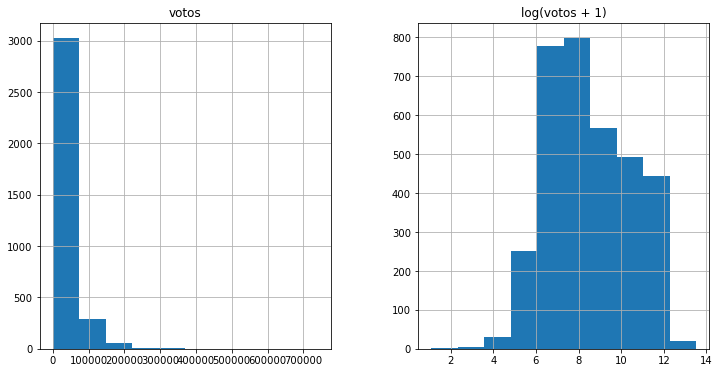

In [6]:
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
prices = pd.DataFrame({"votos":train["votos"], "log(votos + 1)":np.log1p(train["votos"])})
prices.hist()

In [7]:
# log transform the target:
train["votos"] = np.log1p(train["votos"])

# log transform skewed numeric features:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

all_data[skewed_feats] = np.log1p(all_data[skewed_feats])

In [8]:
all_data = pd.get_dummies(all_data)
all_data.head()

,quantidade_doacoes,quantidade_doadores,total_receita,media_receita,recursos_de_outros_candidatos/comites,recursos_de_pessoas_fisicas,recursos_de_pessoas_juridicas,recursos_proprios,quantidade_despesas,quantidade_fornecedores,...,"ocupacao_TÉCNICO DE OBRAS CIVIS, ESTRADAS, SANEAMENTO E ASSEMELHADOS",ocupacao_TÉCNICO EM AGRONOMIA E AGRIMENSURA,ocupacao_TÉCNICO EM EDIFICAÇÕES,ocupacao_TÉCNICO EM INFORMÁTICA,ocupacao_VENDEDOR DE COMÉRCIO VAREJISTA E ATACADISTA,"ocupacao_VENDEDOR PRACISTA, REPRESENTANTE, CAIXEIRO-VIAJANTE E ASSEMELHADOS",ocupacao_VEREADOR,ocupacao_VETERINÁRIO,ocupacao_VIGILANTE,ocupacao_ZOOTECNISTA
nome,,,,,,,,,,,,,,,,,,,,,
JOSÉ LUIZ NOGUEIRA DE SOUSA,1.945910,1.945910,9.717218,7.925760,NaN,9.105091,8.748464,7.170888,2.708050,2.708050,...,0,0,0,0,0,0,1,0,0,0
LOIVA DE OLIVEIRA,2.639057,2.639057,10.035699,7.471276,8.798757,9.615872,6.908755,5.308268,3.218876,3.178054,...,0,0,0,0,0,0,0,0,0,0
MARIA DALVA DE SOUZA FIGUEIREDO,2.890372,2.833213,11.905790,9.133303,7.719130,10.438547,11.038461,10.993748,4.820282,4.691348,...,0,0,0,0,0,0,0,0,0,0
ROMALDO MILANI,1.945910,1.945910,8.007074,6.216979,NaN,7.048386,7.004991,6.621406,2.197225,2.197225,...,0,0,0,0,0,0,0,0,0,0
ANSELMO DE JESUS ABREU,3.891820,3.891820,NaN,NaN,NaN,10.837206,NaN,11.141035,4.897840,4.795791,...,0,0,0,0,0,0,0,0,0,0


In [9]:
# filling NA's with the mean of the column:
all_data = all_data.fillna(all_data.mean())
all_data.head()

,quantidade_doacoes,quantidade_doadores,total_receita,media_receita,recursos_de_outros_candidatos/comites,recursos_de_pessoas_fisicas,recursos_de_pessoas_juridicas,recursos_proprios,quantidade_despesas,quantidade_fornecedores,...,"ocupacao_TÉCNICO DE OBRAS CIVIS, ESTRADAS, SANEAMENTO E ASSEMELHADOS",ocupacao_TÉCNICO EM AGRONOMIA E AGRIMENSURA,ocupacao_TÉCNICO EM EDIFICAÇÕES,ocupacao_TÉCNICO EM INFORMÁTICA,ocupacao_VENDEDOR DE COMÉRCIO VAREJISTA E ATACADISTA,"ocupacao_VENDEDOR PRACISTA, REPRESENTANTE, CAIXEIRO-VIAJANTE E ASSEMELHADOS",ocupacao_VEREADOR,ocupacao_VETERINÁRIO,ocupacao_VIGILANTE,ocupacao_ZOOTECNISTA
nome,,,,,,,,,,,,,,,,,,,,,
JOSÉ LUIZ NOGUEIRA DE SOUSA,1.945910,1.945910,9.717218,7.925760,8.324939,9.105091,8.748464,7.170888,2.708050,2.708050,...,0,0,0,0,0,0,1,0,0,0
LOIVA DE OLIVEIRA,2.639057,2.639057,10.035699,7.471276,8.798757,9.615872,6.908755,5.308268,3.218876,3.178054,...,0,0,0,0,0,0,0,0,0,0
MARIA DALVA DE SOUZA FIGUEIREDO,2.890372,2.833213,11.905790,9.133303,7.719130,10.438547,11.038461,10.993748,4.820282,4.691348,...,0,0,0,0,0,0,0,0,0,0
ROMALDO MILANI,1.945910,1.945910,8.007074,6.216979,8.324939,7.048386,7.004991,6.621406,2.197225,2.197225,...,0,0,0,0,0,0,0,0,0,0
ANSELMO DE JESUS ABREU,3.891820,3.891820,9.634619,7.466020,8.324939,10.837206,10.011960,11.141035,4.897840,4.795791,...,0,0,0,0,0,0,0,0,0,0


### 2.2) Construir modelos de regressão com (ridge e lasso) e sem regularização.
### 2.3) Considerar outros modelos ainda não vistos em sala de sua escolha (e.g. SVR, Regression Trees, KNN e Random Florests).
### 2.4) Tunar os hiperâmetros para cada caso e retornar os rmses de validação cruzada para todos os modelos avaliados.
### 2.5) Plotar os resíduos versus predições e analisar se esses plots representam bons indícios da adequabilidade dos modelos a esse problema.

In [10]:
# creating matrices for sklearn:
X_train = all_data[:train.shape[0]]
X_test = all_data[train.shape[0]:]
y = train.votos

In [11]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score

def rmse_cv(model, X_train, y):
    rmse= np.sqrt(-cross_val_score(model, X_train, y, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

## Ridge

In [12]:
model_ridge = None

# tunando hiperâmetros
alphas = [0.001, 0.0025, 0.005, 0.0075, 0.01, 0.025, 0.05, 0.075, 0.1, 0.25, 0.5, 1, 2.5, 5, 10, 15, 30, 50, 75, 85, 100]

cv_ridge = []
min_ridge_rmse = float("inf")
for alpha in alphas:
    model_ridge_tmp = Ridge(alpha = alpha)
    ridge_rmse = rmse_cv(model_ridge_tmp, X_train, y).mean()
    cv_ridge.append(ridge_rmse)
    if ridge_rmse < min_ridge_rmse:
        min_ridge_rmse = ridge_rmse
        model_ridge = model_ridge_tmp

Text(0, 0.5, 'rmse')

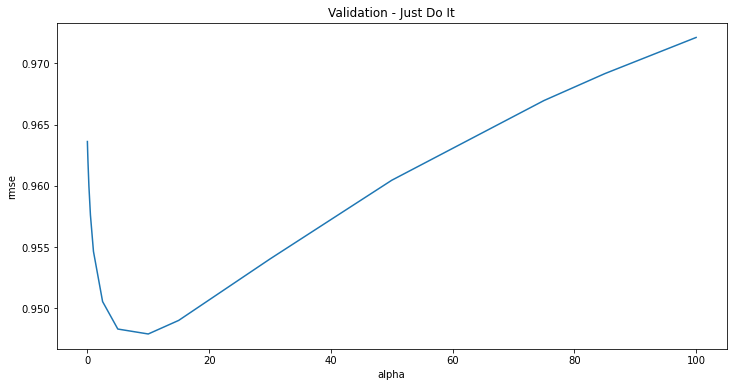

In [13]:
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validation - Just Do It")
plt.xlabel("alpha")
plt.ylabel("rmse")

#### Ridge: RMSE

In [14]:
min_ridge_rmse

0.9479115249847091

#### Ridge: Coefficients

Text(0.5, 1.0, 'Coefficients in the Ridge Model')

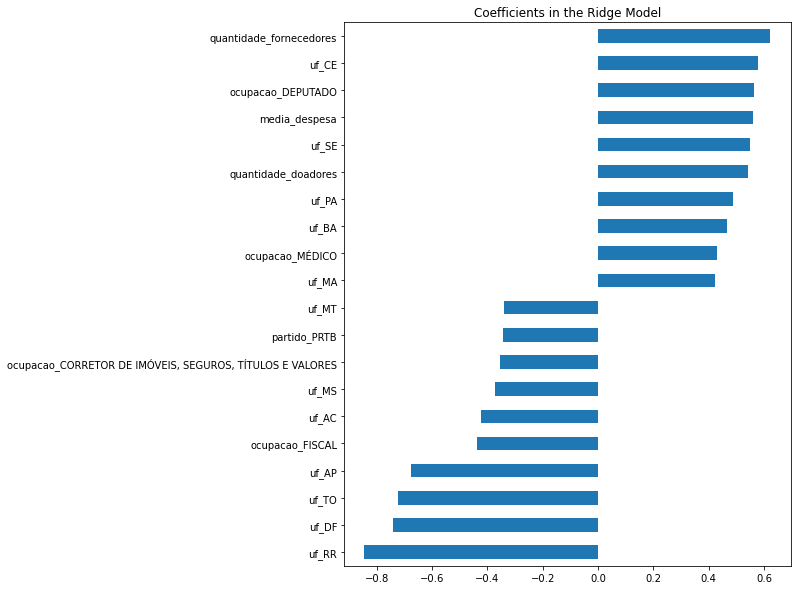

In [15]:
model_ridge.fit(X_train, y)
coef = pd.Series(model_ridge.coef_, index = X_train.columns)
imp_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])

matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Ridge Model")

#### Ridge: Resíduos vs Predições

<AxesSubplot:xlabel='preds', ylabel='residuals'>

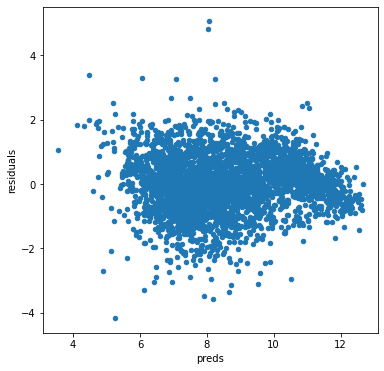

In [16]:
# let's look at the residuals as well:
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)

preds = pd.DataFrame({"preds":model_ridge.predict(X_train), "true":y})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")

## Lasso

In [17]:
# tunando hiperâmetros
model_lasso = LassoCV(alphas = [1, 0.75, 0.5, 0.25, 0.1, 0.075, 0.05, 0.025, 0.01, 0.0075, 0.005, 0.0025, 0.001, 0.00075, 0.0005, 0.00025, 0.0001], max_iter=5000).fit(X_train, y)

#### Lasso: RMSE

In [18]:
rmse_cv(model_lasso, X_train, y).mean()

0.9585032441908858

#### Lasso: Coefficients

In [19]:
coef = pd.Series(model_lasso.coef_, index = X_train.columns)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 111 variables and eliminated the other 148 variables


Text(0.5, 1.0, 'Coefficients in the Lasso Model')

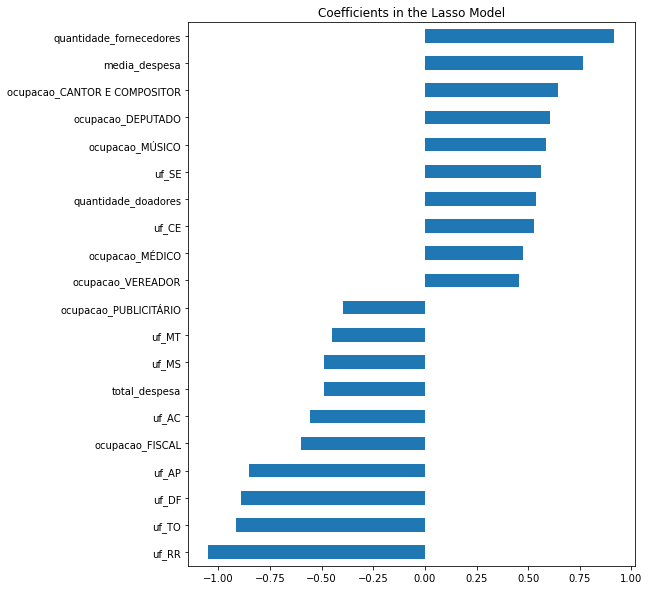

In [20]:
imp_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])

matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")

#### Lasso: Resíduos vs Predições

<AxesSubplot:xlabel='preds', ylabel='residuals'>

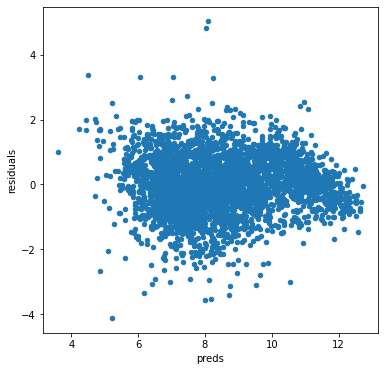

In [21]:
# let's look at the residuals as well:
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)

preds = pd.DataFrame({"preds":model_lasso.predict(X_train), "true":y})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")

In [22]:
import xgboost as xgb

dtrain = xgb.DMatrix(X_train, label = y)
dtest = xgb.DMatrix(X_test)

params = {"max_depth":2, "eta":0.1}
model = xgb.cv(params, dtrain,  num_boost_round=500, early_stopping_rounds=100)

C:\Users\ghust\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\ghust\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


<AxesSubplot:>

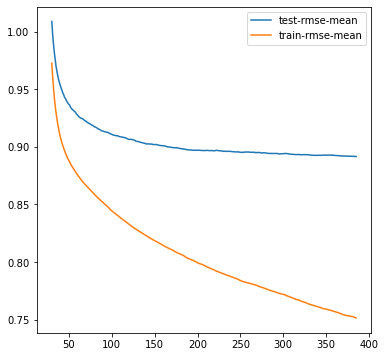

In [23]:
model.loc[30:,["test-rmse-mean", "train-rmse-mean"]].plot()

In [24]:
model_xgb = xgb.XGBRegressor(n_estimators=360, max_depth=2, learning_rate=0.1) #the params were tuned using xgb.cv
model_xgb.fit(X_train, y)

C:\Users\ghust\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=2, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=360, n_jobs=16,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [25]:
xgb_preds = np.expm1(model_xgb.predict(X_test))
lasso_preds = np.expm1(model_lasso.predict(X_test))

<AxesSubplot:xlabel='xgb', ylabel='lasso'>

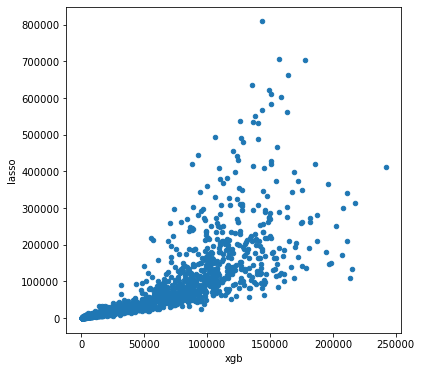

In [26]:
from scipy import stats

predictions = pd.DataFrame({"xgb":xgb_preds, "lasso":lasso_preds})

# remove outliers
predictions = predictions[(np.abs(stats.zscore(predictions)) < 10).all(axis=1)]

predictions.plot(x = "xgb", y = "lasso", kind = "scatter")

In [27]:
preds = 0.7 * lasso_preds + 0.3 * xgb_preds

# converte os votos para int
preds = preds.astype('int')

In [28]:
solution = pd.DataFrame({"nome":test.index, "votos":preds})
solution.to_csv("ridge_sol.csv", index = False)

In [29]:
solution.head(20)

,nome,votos
0,ANTONIA LUCILEIA CRUZ RAMOS CAMARA,26239
1,DEODATO NUNES DE FRANÇA,1634
2,EDSON FIRMINO DE PAULA,734
3,ELISABETH APARECIDA GARCIA RODRIGUES,360
4,FLAVIANO FLAVIO BAPTISTA DE MELO,26706
5,FRANCISCO ALVES VIEIRA,1054
6,FRANCISCO CARLOS DE OLIVEIRA DE LIMA,783
7,FRANCISCO JOSE BENICIO DIAS,897
8,JOSE ALVES DE MORAES,519
9,MARCIO MIGUEL BITTAR,22351


In [30]:
test.loc[:, "votos":"votos"].head(20)

,votos
nome,
ANTONIA LUCILEIA CRUZ RAMOS CAMARA,15849
DEODATO NUNES DE FRANÇA,4620
EDSON FIRMINO DE PAULA,312
ELISABETH APARECIDA GARCIA RODRIGUES,1357
FLAVIANO FLAVIO BAPTISTA DE MELO,36301
FRANCISCO ALVES VIEIRA,3378
FRANCISCO CARLOS DE OLIVEIRA DE LIMA,3377
FRANCISCO JOSE BENICIO DIAS,1082
JOSE ALVES DE MORAES,943


<AxesSubplot:xlabel='votos_preditos', ylabel='votos'>

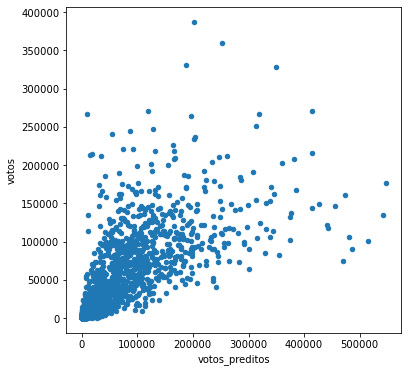

In [31]:
votos_vs_votos_preditos = pd.DataFrame({"votos": test["votos"].values, "votos_preditos": preds})

# remove outliers
votos_vs_votos_preditos = votos_vs_votos_preditos[(np.abs(stats.zscore(votos_vs_votos_preditos)) < 8).all(axis=1)]

votos_vs_votos_preditos.plot(x = "votos_preditos", y = "votos", kind = "scatter")

## RandomForestRegressor

In [32]:
y_test = test.votos

from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor(n_estimators = 50, random_state = 42, max_depth=8)

# Train the model on training data
model_rf.fit(X_train, y);

In [33]:
# Use the forest's predict method on the test data
predictions = model_rf.predict(X_test)

# Calculate the absolute errors
errors = abs(predictions - y_test)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 22454.66 degrees.


In [34]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 0.94 %.


#### RandomForestRegressor: RMSE

In [35]:
rmse_cv(model_rf, X_train, y).mean()

0.9399565049950297

#### RandomForestRegressor: Resíduos vs Predições

<AxesSubplot:xlabel='preds', ylabel='residuals'>

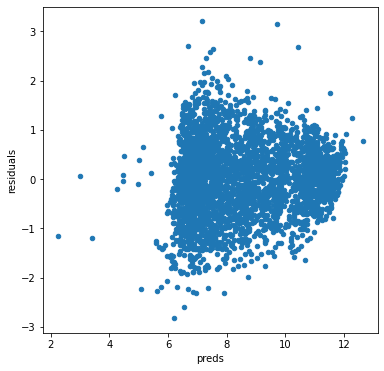

In [36]:
# let's look at the residuals as well:
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)

preds = pd.DataFrame({"preds":model_rf.predict(X_train), "true":y})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")

### 3) Alguns dias antes da entrega final serão liberados os dados de teste referentes à 2014 para validação final dos seus melhores modelos.
### 3.1) Dica: Uma coisa que você pode fazer é usar os dados de 2006 como treino e os de 2010 como validação. Uma vez encontrados os melhores modelos para 2010 junte 2006+2010, retreine, e aplique o modelo aos dados de 2014 que serão liberados.

In [37]:
# Colunas carregadas do CSV
cols = [
    "ano",
    "nome",
    "sexo",
    "estado_civil",
    "grau",
    "ocupacao",
    "uf",
    "partido",
    "quantidade_doacoes",
    "quantidade_doadores",
    "total_receita",
    "media_receita",
    "recursos_de_outros_candidatos/comites",
    "recursos_de_pessoas_fisicas",
    "recursos_de_pessoas_juridicas",
    "recursos_proprios",
    "quantidade_despesas",
    "quantidade_fornecedores",
    "total_despesa",
    "media_despesa",
    "votos",
]

df_2006_2010 = pd.read_csv("eleicoes_2006_a_2010.csv", usecols=cols, index_col="nome")

# junta os dados de 2006 e 2010 para treino
train = df_2006_2010.loc[:,'uf':]

# dados de 2014 como teste
df_2014 = pd.read_csv("eleicoes_2014.csv", usecols=cols, index_col="nome")
test = df_2014.loc[:,'uf':]

# junta os dados de 2006, 2010 e 2014 sem as colunas "ano" e "votos"
all_data = pd.concat((
    train.loc[:,:'ocupacao'],
    test.loc[:,:'ocupacao']
))

In [38]:
train.head()

,uf,partido,quantidade_doacoes,quantidade_doadores,total_receita,media_receita,recursos_de_outros_candidatos/comites,recursos_de_pessoas_fisicas,recursos_de_pessoas_juridicas,recursos_proprios,quantidade_despesas,quantidade_fornecedores,total_despesa,media_despesa,sexo,grau,estado_civil,ocupacao,votos
nome,,,,,,,,,,,,,,,,,,,
JOSÉ LUIZ NOGUEIRA DE SOUSA,AP,PT,6,6,16600.00,2766.666667,NaN,9000.0,6300.00,1300.0,14,14,16583.60,1184.542857,MASCULINO,ENSINO MÉDIO COMPLETO,CASADO(A),VEREADOR,8579
LOIVA DE OLIVEIRA,RO,PT,13,13,22826.00,1755.846154,6625.0,15000.0,1000.00,201.0,24,23,20325.99,883.738696,FEMININO,SUPERIOR COMPLETO,SOLTEIRO(A),SERVIDOR PÚBLICO ESTADUAL,2757
MARIA DALVA DE SOUZA FIGUEIREDO,AP,PT,17,16,148120.80,9257.550000,2250.0,34150.0,62220.80,59500.0,123,108,146011.70,1351.960185,FEMININO,SUPERIOR COMPLETO,VIÚVO(A),PEDAGOGO,17428
ROMALDO MILANI,MS,PRONA,6,6,3001.12,500.186667,NaN,1150.0,1101.12,750.0,8,8,3001.12,375.140000,MASCULINO,ENSINO MÉDIO INCOMPLETO,CASADO(A),MILITAR REFORMADO,1193
ANSELMO DE JESUS ABREU,RO,PT,48,48,NaN,NaN,NaN,50878.0,NaN,68942.0,133,120,116416.64,970.138667,MASCULINO,ENSINO FUNDAMENTAL COMPLETO,CASADO(A),DEPUTADO,29401


In [39]:
test.head()

,uf,partido,quantidade_doacoes,quantidade_doadores,total_receita,media_receita,recursos_de_outros_candidatos/comites,recursos_de_pessoas_fisicas,recursos_de_pessoas_juridicas,recursos_proprios,quantidade_despesas,quantidade_fornecedores,total_despesa,media_despesa,sexo,grau,estado_civil,ocupacao,votos
nome,,,,,,,,,,,,,,,,,,,
EMERSON DA SILVA SANTOS,AC,PSOL,3,3,1580.00,526.666667,NaN,1500.00,NaN,NaN,3,3,1580.00,526.666667,MASCULINO,ENSINO MÉDIO COMPLETO,SOLTEIRO(A),"CORRETOR DE IMÓVEIS, SEGUROS, TÍTULOS E VALORES",37
GERALDO SILVA DOS SANTOS,AC,PSOL,5,5,3180.00,636.000000,NaN,3100.00,NaN,NaN,6,5,3130.02,626.004000,MASCULINO,SUPERIOR COMPLETO,SOLTEIRO(A),VIGILANTE,383
CARLOS CESAR CORREIA DE MESSIAS,AC,PSB,40,38,333293.13,8770.871842,1923.07,65700.00,154170.06,115000.00,145,139,326869.78,2351.581151,MASCULINO,ENSINO FUNDAMENTAL INCOMPLETO,CASADO(A),OUTROS,26448
IDESIO LUIS FRANKE,AC,PT,29,29,156719.32,5404.114483,39122.32,68783.84,17000.00,6813.16,136,121,241016.07,1991.868347,MASCULINO,SUPERIOR COMPLETO,CASADO(A),AGRÔNOMO,9896
LEONARDO CUNHA DE BRITO,AC,PT,160,146,711083.00,4870.431507,10000.00,347073.00,277000.00,78000.00,518,354,567401.15,1602.828107,MASCULINO,SUPERIOR COMPLETO,CASADO(A),ADVOGADO,20876


In [40]:
all_data

,uf,partido,quantidade_doacoes,quantidade_doadores,total_receita,media_receita,recursos_de_outros_candidatos/comites,recursos_de_pessoas_fisicas,recursos_de_pessoas_juridicas,recursos_proprios,quantidade_despesas,quantidade_fornecedores,total_despesa,media_despesa,sexo,grau,estado_civil,ocupacao
nome,,,,,,,,,,,,,,,,,,
JOSÉ LUIZ NOGUEIRA DE SOUSA,AP,PT,6,6,16600.00,2766.666667,NaN,9000.0,6300.00,1300.0,14,14,16583.60,1184.542857,MASCULINO,ENSINO MÉDIO COMPLETO,CASADO(A),VEREADOR
LOIVA DE OLIVEIRA,RO,PT,13,13,22826.00,1755.846154,6625.00,15000.0,1000.00,201.0,24,23,20325.99,883.738696,FEMININO,SUPERIOR COMPLETO,SOLTEIRO(A),SERVIDOR PÚBLICO ESTADUAL
MARIA DALVA DE SOUZA FIGUEIREDO,AP,PT,17,16,148120.80,9257.550000,2250.00,34150.0,62220.80,59500.0,123,108,146011.70,1351.960185,FEMININO,SUPERIOR COMPLETO,VIÚVO(A),PEDAGOGO
ROMALDO MILANI,MS,PRONA,6,6,3001.12,500.186667,NaN,1150.0,1101.12,750.0,8,8,3001.12,375.140000,MASCULINO,ENSINO MÉDIO INCOMPLETO,CASADO(A),MILITAR REFORMADO
ANSELMO DE JESUS ABREU,RO,PT,48,48,NaN,NaN,NaN,50878.0,NaN,68942.0,133,120,116416.64,970.138667,MASCULINO,ENSINO FUNDAMENTAL COMPLETO,CASADO(A),DEPUTADO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
JOENICE PEREIRA RIBEIRO,TO,PR,7,6,6334.29,1055.715000,6482.29,NaN,NaN,NaN,7,6,6334.29,1055.715000,FEMININO,SUPERIOR COMPLETO,CASADO(A),PROFESSOR DE ENSINO MÉDIO
TIAGO DE PAULA ANDRINO,TO,PP,42,42,1738508.82,41393.067143,54175.62,260000.0,1311000.00,13333.2,646,492,1799447.74,3657.414106,MASCULINO,SUPERIOR COMPLETO,SOLTEIRO(A),OUTROS
ETEVALDO DA PAZ NONATO,TO,PSOL,3,3,1230.00,410.000000,NaN,1230.0,NaN,NaN,3,3,1230.00,410.000000,MASCULINO,ENSINO MÉDIO COMPLETO,SOLTEIRO(A),ELETRICISTA E ASSEMELHADOS


#### Data preprocessing

array([[<AxesSubplot:title={'center':'votos'}>,
        <AxesSubplot:title={'center':'log(votos + 1)'}>]], dtype=object)

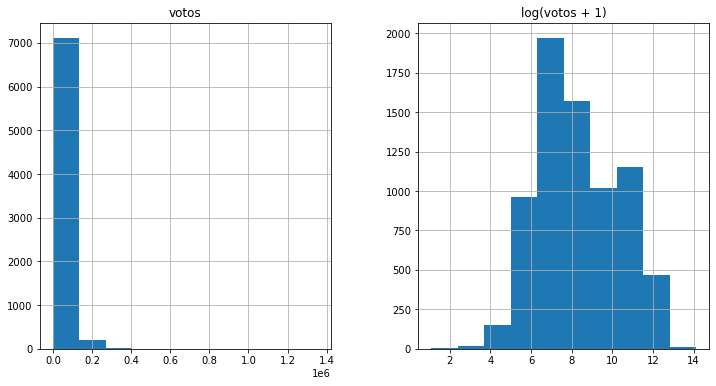

In [41]:
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
prices = pd.DataFrame({"votos":train["votos"], "log(votos + 1)":np.log1p(train["votos"])})
prices.hist()

In [42]:
# log transform the target:
train["votos"] = np.log1p(train["votos"])

# log transform skewed numeric features:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

all_data[skewed_feats] = np.log1p(all_data[skewed_feats])

In [43]:
all_data = pd.get_dummies(all_data)
all_data.head()

,quantidade_doacoes,quantidade_doadores,total_receita,media_receita,recursos_de_outros_candidatos/comites,recursos_de_pessoas_fisicas,recursos_de_pessoas_juridicas,recursos_proprios,quantidade_despesas,quantidade_fornecedores,...,ocupacao_TÉCNICO DE QUÍMICA,ocupacao_TÉCNICO EM AGRONOMIA E AGRIMENSURA,ocupacao_TÉCNICO EM EDIFICAÇÕES,ocupacao_TÉCNICO EM INFORMÁTICA,ocupacao_VENDEDOR DE COMÉRCIO VAREJISTA E ATACADISTA,"ocupacao_VENDEDOR PRACISTA, REPRESENTANTE, CAIXEIRO-VIAJANTE E ASSEMELHADOS",ocupacao_VEREADOR,ocupacao_VETERINÁRIO,ocupacao_VIGILANTE,ocupacao_ZOOTECNISTA
nome,,,,,,,,,,,,,,,,,,,,,
JOSÉ LUIZ NOGUEIRA DE SOUSA,1.945910,1.945910,9.717218,7.925760,NaN,9.105091,8.748464,7.170888,2.708050,2.708050,...,0,0,0,0,0,0,1,0,0,0
LOIVA DE OLIVEIRA,2.639057,2.639057,10.035699,7.471276,8.798757,9.615872,6.908755,5.308268,3.218876,3.178054,...,0,0,0,0,0,0,0,0,0,0
MARIA DALVA DE SOUZA FIGUEIREDO,2.890372,2.833213,11.905790,9.133303,7.719130,10.438547,11.038461,10.993748,4.820282,4.691348,...,0,0,0,0,0,0,0,0,0,0
ROMALDO MILANI,1.945910,1.945910,8.007074,6.216979,NaN,7.048386,7.004991,6.621406,2.197225,2.197225,...,0,0,0,0,0,0,0,0,0,0
ANSELMO DE JESUS ABREU,3.891820,3.891820,NaN,NaN,NaN,10.837206,NaN,11.141035,4.897840,4.795791,...,0,0,0,0,0,0,0,0,0,0


In [44]:
# filling NA's with the mean of the column:
all_data = all_data.fillna(all_data.mean())
all_data.head()

,quantidade_doacoes,quantidade_doadores,total_receita,media_receita,recursos_de_outros_candidatos/comites,recursos_de_pessoas_fisicas,recursos_de_pessoas_juridicas,recursos_proprios,quantidade_despesas,quantidade_fornecedores,...,ocupacao_TÉCNICO DE QUÍMICA,ocupacao_TÉCNICO EM AGRONOMIA E AGRIMENSURA,ocupacao_TÉCNICO EM EDIFICAÇÕES,ocupacao_TÉCNICO EM INFORMÁTICA,ocupacao_VENDEDOR DE COMÉRCIO VAREJISTA E ATACADISTA,"ocupacao_VENDEDOR PRACISTA, REPRESENTANTE, CAIXEIRO-VIAJANTE E ASSEMELHADOS",ocupacao_VEREADOR,ocupacao_VETERINÁRIO,ocupacao_VIGILANTE,ocupacao_ZOOTECNISTA
nome,,,,,,,,,,,,,,,,,,,,,
JOSÉ LUIZ NOGUEIRA DE SOUSA,1.945910,1.945910,9.717218,7.925760,8.370968,9.105091,8.748464,7.170888,2.708050,2.708050,...,0,0,0,0,0,0,1,0,0,0
LOIVA DE OLIVEIRA,2.639057,2.639057,10.035699,7.471276,8.798757,9.615872,6.908755,5.308268,3.218876,3.178054,...,0,0,0,0,0,0,0,0,0,0
MARIA DALVA DE SOUZA FIGUEIREDO,2.890372,2.833213,11.905790,9.133303,7.719130,10.438547,11.038461,10.993748,4.820282,4.691348,...,0,0,0,0,0,0,0,0,0,0
ROMALDO MILANI,1.945910,1.945910,8.007074,6.216979,8.370968,7.048386,7.004991,6.621406,2.197225,2.197225,...,0,0,0,0,0,0,0,0,0,0
ANSELMO DE JESUS ABREU,3.891820,3.891820,9.670482,7.468538,8.370968,10.837206,10.021113,11.141035,4.897840,4.795791,...,0,0,0,0,0,0,0,0,0,0


In [45]:
# creating matrices for sklearn:
X_train = all_data[:train.shape[0]]
X_test = all_data[train.shape[0]:]
y = train.votos

## Ridge (retreino)

In [46]:
model_ridge = None

alphas = [0.001, 0.0025, 0.005, 0.0075, 0.01, 0.025, 0.05, 0.075, 0.1, 0.25, 0.5, 1, 2.5, 5, 10, 15, 30, 50, 75, 85, 100]

cv_ridge = []
min_ridge_rmse = float("inf")
for alpha in alphas:
    model_ridge_tmp = Ridge(alpha = alpha)
    ridge_rmse = rmse_cv(model_ridge_tmp, X_train, y).mean()
    cv_ridge.append(ridge_rmse)
    if ridge_rmse < min_ridge_rmse:
        min_ridge_rmse = ridge_rmse
        model_ridge = model_ridge_tmp

#### Ridge: RMSE

In [47]:
min_ridge_rmse

1.014233447104668

## Lasso (retreino)

In [48]:
model_lasso = LassoCV(alphas = [1, 0.75, 0.5, 0.25, 0.1, 0.075, 0.05, 0.025, 0.01, 0.0075, 0.005, 0.0025, 0.001, 0.00075, 0.0005, 0.00025, 0.0001], max_iter=5000).fit(X_train, y)

#### Lasso: RMSE

In [49]:
rmse_cv(model_lasso, X_train, y).mean()

1.0176304272725223

## RandomForestRegressor (retreino)

In [50]:
y_test = test.votos

model_rf = RandomForestRegressor(n_estimators = 150, random_state = 42, max_depth=50)

# Train the model on training data
model_rf.fit(X_train, y);

#### RandomForestRegressor: RMSE

In [51]:
rmse_cv(model_rf, X_train, y).mean()

0.9879650357238319

### 4.1) Responder: Dentre os modelos avaliados, qual foi o que deu o melhor resultado nos dados de 2014 em termos de RMSE? Justifique bem sua resposta.